**Quantum Fourier transform**

On the computational basis

$$
|\tilde j\rangle  = QFT(j)=
\frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} e^{\frac{2\pi ijk}{N}} |k\rangle = \\
=
\frac{1}{\sqrt{N}}\left(|0\rangle+e^{\frac{2\pi ij}{2}} |1\rangle \right)\otimes\left(|0\rangle+e^{\frac{2\pi ij}{2^2}} |1\rangle\right)\otimes \cdots \otimes \left(|0\rangle+e^{\frac{2\pi ij}{2^n}} |1\rangle\right)
$$

state $|\tilde j\rangle$ is obtained as the superposition of all the $2^n$ computational basis states $|k\rangle$. 
In particluar we are computing a column of $F_N$ since we are computing $|\tilde j\rangle=F_N |j\rangle.$


In [90]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram, plot_state_city, plot_bloch_multivector

In [91]:
from qiskit.circuit.library import QFT, PhaseEstimation,PhaseGate, CPhaseGate
from qiskit.circuit.gate import Gate
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator
import warnings 
warnings.filterwarnings('ignore')

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [361]:
def myQFT(nqubits):
    # returns the circuit for gthe QFT of states with nqubits qubits
    myQFT_circuit= QuantumCircuit(nqubits)
###############################
    # SWAP THE QUBITS
    # APPLY ROTATIONS
 
    return myQFT_circuit


[Qubit(QuantumRegister(3, 'q'), 2), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 0)]
Computational Basis |011>


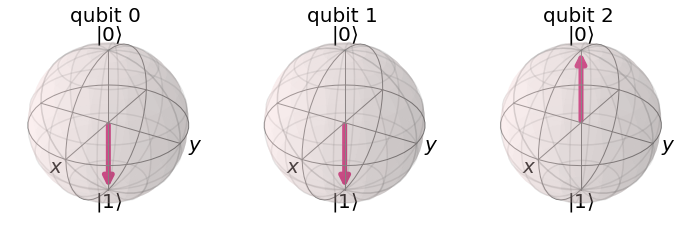

(QFT) Fourier Basis|(state)>


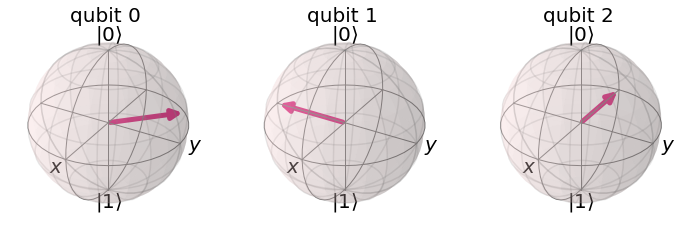

(myQFT) Fourier Basis|011>


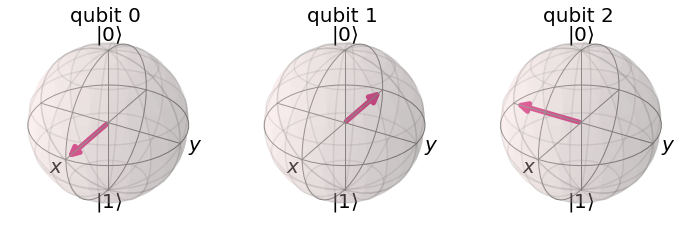

In [364]:
state='011'

mycircuit= QuantumCircuit(len(state))
print(mycircuit.qubits[::-1])
mycircuit.initialize(Statevector.from_label(state).data, mycircuit.qubits)
print(f'Computational Basis |{state}>')
display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data))
print(f'(QFT) Fourier Basis|(state)>')
mycircuit.append(QFT(len(state)), mycircuit.qubits)
display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data))

state='011'

mycircuit= QuantumCircuit(len(state))
#print(mycircuit.qubits[::-1])
mycircuit.initialize(Statevector.from_label(state).data, mycircuit.qubits)
#print(f'Computational Basis |(state)>')
#display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data))
print(f'(myQFT) Fourier Basis|{state}>')
mycircuit.append(myQFT(len(state)), mycircuit.qubits)
display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data))


In [310]:
nqubit = 

Let us look at the state vector when we apply *myQFT* to a computational basis state

In [311]:
init_state = np.zeros(2**nqubit)
init_state[5] = 1
list_state = init_state.tolist()

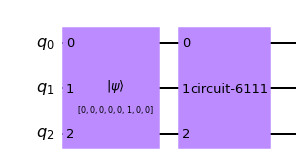

In [312]:
qc2 = QuantumCircuit(nqubit)

qc2.initialize(list_state, list(range(nqubit)))
qc2.append(myQFT(nqubit), list(range(nqubit)))

qc2.draw('mpl')

In [315]:
sim = Aer.get_backend('statevector_simulator')
job = execute(qc2, sim, shots=1)
#display(array_to_latex(result, max_size=30))print(numpy.around(result,2))#ordine: primo checker, secondo q, x1,x0. Mo sto prendendo 01
result = job.result().get_statevector(qc2)
print(result)
print(np.linalg.norm(result-z))

Statevector([ 3.53553391e-01-8.65956056e-17j,
             -2.50000000e-01-2.50000000e-01j,
              1.08244507e-16+3.53553391e-01j,
              2.50000000e-01-2.50000000e-01j,
             -3.53553391e-01+8.65956056e-17j,
              2.50000000e-01+2.50000000e-01j,
             -1.08244507e-16-3.53553391e-01j,
             -2.50000000e-01+2.50000000e-01j],
            dims=(2, 2, 2))
4.343430442552459e-16


If we measure we get the following

In [316]:
qc2.measure_all()

In [317]:
simulator = Aer.get_backend('qasm_simulator')
resultsim = execute(qc2, simulator, shots=9800).result()
counts = resultsim.get_counts(qc2)

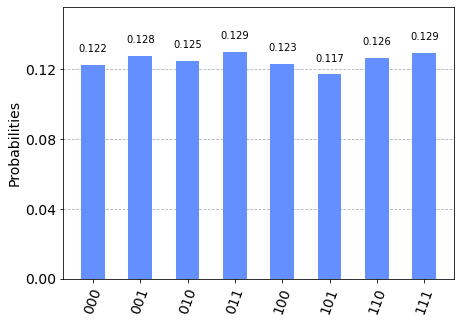

In [318]:
plot_histogram(counts)

In [319]:
random_init_state=np.random.randn(2**nqubit)+1j*np.random.randn(2**nqubit)
random_init_state=random_init_state/np.linalg.norm(random_init_state)
list_state=random_init_state.tolist()
for i in range(2**nqubit):
    print('%.2f %.2fi' % (list_state[i].real, list_state[i].imag))

0.21 -0.24i
0.09 -0.02i
-0.10 -0.04i
0.60 -0.06i
-0.17 0.01i
0.17 0.44i
0.01 -0.06i
-0.50 -0.10i


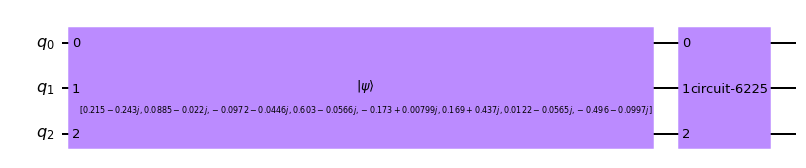

In [320]:
qc2 = QuantumCircuit(nqubit)
qc2.initialize(list_state, list(range(nqubit)))
qc2.append(myQFT(nqubit), list(range(nqubit)))

qc2.draw('mpl')

In [321]:
import matplotlib.pyplot as plt
sim = Aer.get_backend('statevector_simulator')
job = execute(qc2, sim, shots=1)
#display(array_to_latex(result, max_size=30))print(numpy.around(result,2))#ordine: primo checker, secondo q, x1,x0. Mo sto prendendo 01
result2 = job.result().get_statevector(qc2)
print(result2)

Statevector([ 0.11354147-0.02746892j, -0.05801355+0.00191239j,
             -0.15693755+0.00580106j,  0.54000521+0.33006286j,
             -0.14414059-0.21011907j,  0.32387573-0.25667252j,
              0.24664434-0.10039118j, -0.25726906-0.43008419j],
            dims=(2, 2, 2))


In [322]:
print(z/np.array(result2))

[ 2.94169437+0.71167985j  4.16275903+4.44656124j  0.08316015-2.24975459j
  0.13103474-0.54304976j  0.78490861-1.14419033j  0.09837902+0.84986667j
  0.5005321 -1.22972369j -0.17201712-0.68417927j]


In [323]:
import matplotlib.pyplot as plt
import scipy as sp
z=np.fft.ifft(random_init_state)
z=z/np.linalg.norm(z)
print(z)
np.linalg.norm(result2-z)

[ 0.11354147-0.02746892j -0.05801355+0.00191239j -0.15693755+0.00580106j
  0.54000521+0.33006286j -0.14414059-0.21011907j  0.32387573-0.25667252j
  0.24664434-0.10039118j -0.25726906-0.43008419j]


4.056750157215235e-16

In [324]:
qc2.measure_all()

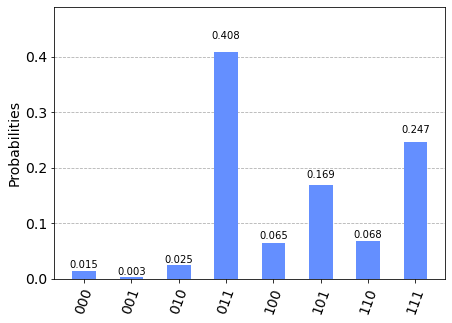

In [331]:
simulator = Aer.get_backend('qasm_simulator')
resultsim = execute(qc2, simulator, shots=10000).result()
counts = resultsim.get_counts(qc2)
plot_histogram(counts)

The counts values are very close to the amplitudes squered

In [328]:
print(np.abs(result2)**2)

[0.01364621 0.00336923 0.02466305 0.40054712 0.06492653 0.17077628
 0.07091182 0.25115978]


## Quantum Phase Estimation

Given unitary $U$, and an eigenstate $|\psi\rangle$ such that
$$
U|\psi\rangle=e^{i\,\theta_\psi} |\psi\rangle
$$
exctract $|\psi\rangle$. 


Let us start with an easy formulation to better understand how the circuit works. Assume $U$ is already in its diagonal form
$ U=\left[ \begin{array}{cc} 1 & 0\\ 0& e^{i\theta} \end{array}\right],$ so that
$|\psi\rangle=|1\rangle$.


In [332]:
#Here you can insert the phase (=angle), you wish to encode.
theta = np.pi/8 #The phase angle we wish to encode

We first implement the circuit without QFT

In [ ]:
r_qubit = 1 # result qubit
## add here the code for the circuit



In [345]:
sim = Aer.get_backend('statevector_simulator')
job = execute(circuit, sim, shots=1)
#display(array_to_latex(result, max_size=30))print(numpy.around(result,2))#ordine: primo checker, secondo q, x1,x0. Mo sto prendendo 01
result2 = job.result().get_statevector(circuit)
print(result2)

Statevector([0.        +0.j        , 0.        +0.j        ,
             0.96193977+0.19134172j, 0.03806023-0.19134172j],
            dims=(2, 2))


In [350]:
circuit.measure(rq, cc)

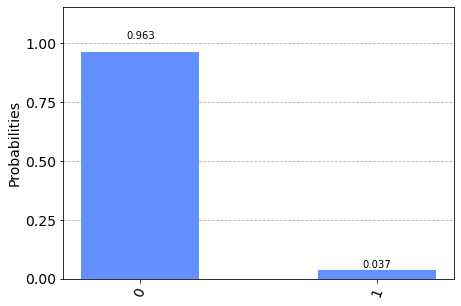

In [351]:
simulator = Aer.get_backend('qasm_simulator')
resultsim = execute(circuit, simulator, shots=9800).result()
counts = resultsim.get_counts(circuit)
plot_histogram(counts)

Depending of the outcome we can get back $\theta$. If the outcome is $|0>$ then the 
the associated probability is $(1+e^{i\theta_\psi})/2$ if the outcome is $|1>$ then is$(1-e^{i\theta_\psi})/2$. In either cases we can retrieve an approximation of $\theta$. 

### Quantum Phase Estimation

In [354]:
from numpy import pi
angle = pi/4 #The phase angle we wish to encode

actual_phase = angle/(2*pi)  #This is the actual phase rotation (We use this value to check the answer)

precision = 3 # we want to approximate the actual_phase with three digits precision
 #### note that in this example it is enougth actual_pase= 1/8= 2^-3

## STEP 1

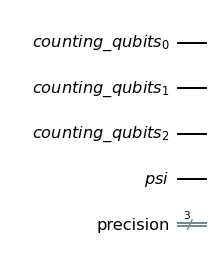

In [355]:
cq = QuantumRegister(precision, 'counting_qubits')
psi = QuantumRegister(1, 'psi')
cc = ClassicalRegister(precision, 'precision')
circuit = QuantumCircuit(cq, psi, cc)

circuit.draw(output='mpl')

## STEP 2

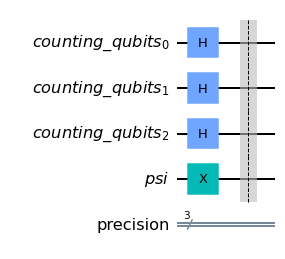

In [356]:
#Superpose counting qubits
circuit.h(cq)

# |psi> = 0 --> X|psi> = 1 (eigenvector of any PhaseGate)
circuit.x(psi)
circuit.barrier()

circuit.draw(output='mpl')

## STEP 3

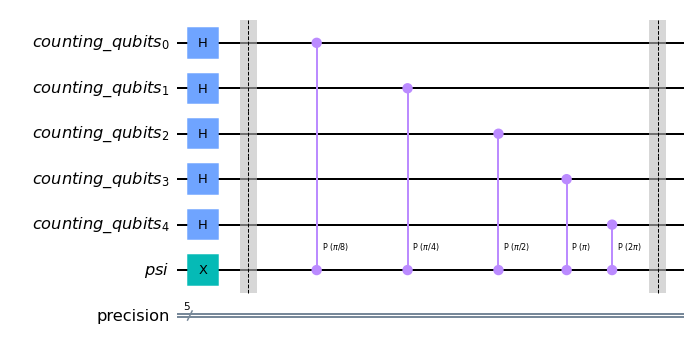

In [175]:
##----- Encoding in the Fourier Basis the phase -----#
for i in range(len(cq)):
    unitary = CPhaseGate(angle*(2**i))
    circuit.append(unitary, [cq[i], psi])
        
circuit.barrier()
circuit.draw(output='mpl')

### STEP 4

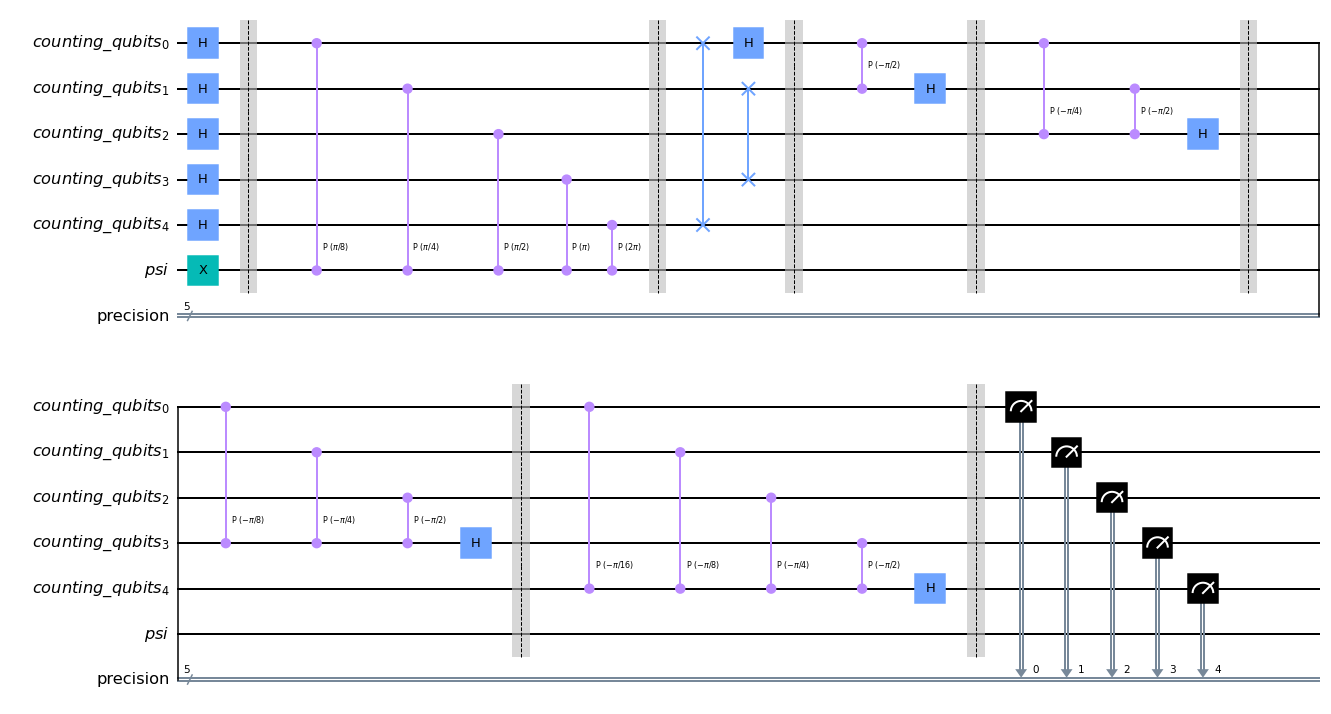

In [176]:
#----- Inverse QFT -----#
for i in range(math.floor(len(cq)/2)):
    if i != len(cq)-i-1:
        circuit.swap(cq[i], cq[len(cq)-i-1])


for i in range(len(cq)):
    for j in range(i):
        controlled_phase_gate = CPhaseGate(-pi/(2**(i-j)))
        circuit.append(controlled_phase_gate, [cq[j], cq[i]])
    circuit.h(cq[i])
    circuit.barrier()


circuit.measure(cq, cc)
circuit.draw(output='mpl')

# Simulate

In [177]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1)
counts = job.result().get_counts()

print("Phase estimation output")
print("-----------------------")

a = counts.most_frequent()
print("Most frequent measurement:", a, "\n")
bin_a = int(a,2) #Converts the binary value to an integer

#(Note that the QPE outputs |2^(len(cq))*angle). So. to obtaing the angle (phase) --> bin_a/(2**len(cq))
phase = bin_a/(2**len(cq)) #The calculation used to estimate the phase 

print("ESTIMATED: ", phase)
print("ACTUAL: ", actual_phase) 

print("Error: ", abs(actual_phase - phase))  # <-- Error != 0, if the number of counting qubits (precision) is not enough to represent the phase in the computational basis

Phase estimation output
-----------------------
Most frequent measurement: 00010 

ESTIMATED:  0.0625
ACTUAL:  0.0625
Error:  0.0


We now try with a  unitary matrix, with an eigenstate encoded on 3 qubits. For simplicity we consider a circulan matrix, whose idenvalues are the 8-th roots of unity. Then we want to approximate $\theta=2 \pi/8=\pi/4$

In [123]:
n=2**3
z=np.zeros(n)
z[1]=1
print(z)
U = sp.linalg.circulant(z)
print(U)

[0. 1. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]


In [124]:
L, E = sp.linalg.eig(U)
print(L)
#idx=np.array(range(n))
#print(np.exp(2*np.pi*idx/n *1j))

[-1.00000000e+00+0.j         -7.07106781e-01+0.70710678j
 -7.07106781e-01-0.70710678j -2.25642425e-18+1.j
 -2.25642425e-18-1.j          1.00000000e+00+0.j
  7.07106781e-01+0.70710678j  7.07106781e-01-0.70710678j]


In [125]:
import math
from numpy import pi as pi
psi_state = E[:, -1]
eval = L[-2] # this eigenvalue is associated to a theta between 0 and pi/2
theta= math.atan(eval.imag/eval.real) 

In [126]:
print(np.abs(theta-pi/4))

3.3306690738754696e-16


In [127]:
def initialize_qubits(given_circuit, measurement_qubits, target_qubit, psi_state):
    given_circuit.h(measurement_qubits)
    given_circuit.initialize(psi_state,target_qubit)

In [128]:
precision =3
t=3 # qubits for the eigenstate psi

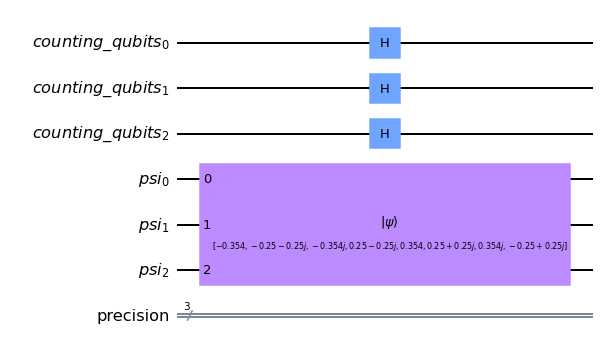

In [129]:
cq = QuantumRegister(precision, 'counting_qubits')
psi = QuantumRegister(t, 'psi')
cc = ClassicalRegister(precision, 'precision')
qc= QuantumCircuit(cq, psi, cc)

initialize_qubits(qc, range(t), range(precision, precision+t), psi_state)
#unitary_operator(qc, U,cq[0],range(n, n+t))
qc.draw(output='mpl')


In [130]:
def unitary_operator(given_circuit, U, control_qubit, target_qubit):

    qc1= QuantumCircuit(target_qubit)
    u_gate = qc1.unitary(U, target_qubit)
    custom = qc1.to_gate().control(1)
    given_circuit.append(custom, [control_qubit, *target_qubit])
    return(given_circuit)

In [131]:
print([cq[0], psi[0:t], cc])

[Qubit(QuantumRegister(3, 'counting_qubits'), 0), [Qubit(QuantumRegister(3, 'psi'), 0), Qubit(QuantumRegister(3, 'psi'), 1), Qubit(QuantumRegister(3, 'psi'), 2)], ClassicalRegister(3, 'precision')]


In [132]:
unitary_operator(qc, U, cq[0], psi[0:t])

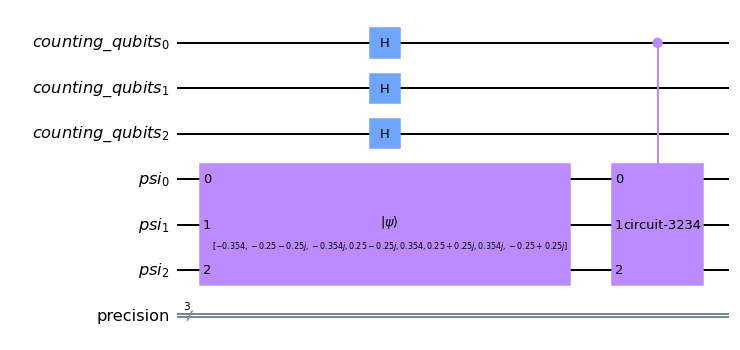

In [133]:
qc.draw('mpl')

In [134]:
def unitary_operator_exponent(given_circuit, U, control_qubit, target_qubit, exponent):
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    given_gate = unitary_operator(given_circuit, np.linalg.matrix_power(U, exponent),control_qubit, target_qubit)
    return given_gate

In [135]:
unitary_operator_exponent(qc, U, cq[0], psi[0:t], 2)

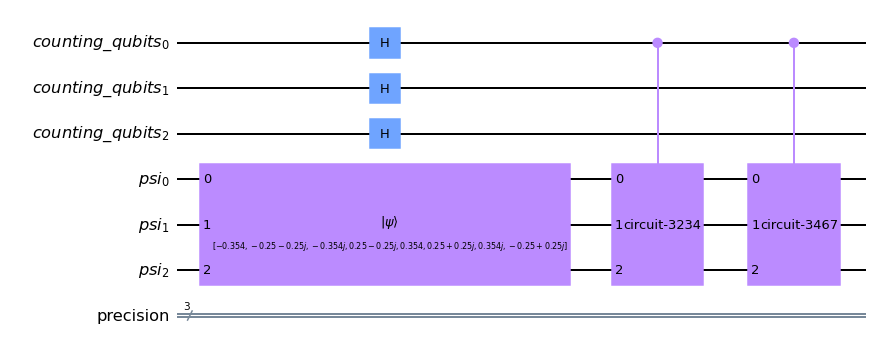

In [136]:
qc.draw('mpl')

In [80]:
def qpe_program(n, psi_state, U):
    
    # Create a quantum circuit on n+t qubits (n measurement, t target)
    t= len(psi_state)
    qc = QuantumCircuit(n+t, n)
    
    # Initialize the qubits
    initialize_qubits(qc, range(n), list(range(n, n+t)), psi_state)
    
    # Apply the controlled unitary operators in sequence
    for x in range(n):
        exponent = 2**(n-x-1)
        unitary_operator_exponent(qc, U, qc.qubits[x], qc.qubits[n], exponent)
        
    # Apply the inverse quantum Fourier transform
    apply_iqft(qc, range(n), n)
    
    # Measure all qubits
    qc.measure(range(n), range(n))
  
    return qc

n = 5; theta = 0.5
mycircuit = qpe_program(n, psi_state, U)
mycircuit.draw(output='text')

TypeError: 'int' object is not iterable

In [117]:
qc = QuantumCircuit(n+t, n)
initialize_qubits(qc, range(n), list(range(n, n+t)), psi_state)
    
   

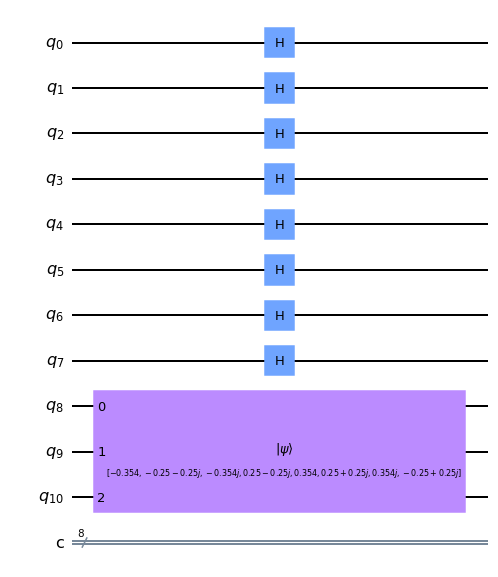

In [118]:
qc.draw('mpl')

In [120]:
qc=unitary_operator_exponent(qc, U, qc[0], psi[0:3], 2)

CircuitError: "Type error handling (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(11, 'q'), 0)], []) (<class 'tuple'>)"